<h2> DATA 319: Model-based and Data-based Methods for Data Analytics. Summer 2024 </h2>
<h3> Problem Set 3 </h3>
<h3> Team <i> (Insert your team number here) </i></h3>
<h3> Type students' names <i> (only those who contributed to the group work)</i> here</h3>

#### 1. In your own words, explain the difference between two tests: ANOVA and MANOVA. How MANOVA is different from a multi-factor ANOVA?

1.


#### 2. For the following two variables 

\begin{bmatrix} X & Y\\ 2 & 2\\ 0 & 0\\ -1 & 3 \\ 0 & 1\\ 0 & 1\\ 0 & 1\\ 1 & -1\\ 1 & 0 \end{bmatrix}

##### (a) Perform a hypothesis test to check whether the population means of the two variables are the same at the α = .05 significance level (assume unequal variances).

##### (b) Report the value of your test statistic and the critical value of the test. Report the p-value of the test and your test decision.

#### 3. This problem references the `baseball.csv` dataset, which has six variables (At Bats, Walks, Strikeouts, Hits, Home Runs) for 25 players from MLB 2021 season. 

##### (a) Report the sample means for each of these six variables.

##### (b) Perform a hypothesis test against $\mu = (570, 60, 130, 160, 30, 90)$ representing the prior year full-league averages at the α = .05 significance level. Report the value of your test statistic and the critical value of the test. Report the p-value of the test and your test decision.

##### (c) Compute $T^2$ simultaneous confidence intervals to give coverage at the 95% confidence level.

##### (d) Compute simultaneous confidence intervals using Bonferroni correction to give coverage at the 95% confidence level.

##### (e) Use your intervals from parts (c) and (d) to determine which component(s) are causing the difference identified in your hypothesis test (if any).

#### 4. Consider the following multivariate dataset

#### $X = \begin{bmatrix}2&2&3\\0&0&2\\-1&3&2\\0&1&1\\0&1&5\\0&1&3\\1&-1&3\\1&0&5\end{bmatrix}$

##### (a) Perform a hypothesis test with the null hypothesis $H_0 : (\mu_1 - \mu_2, \mu_1 - \mu_3) = (0, 0)$ at the α = .05 significance level. Obtain the differences using the contrast matrix. Report the value of your test statistic and the critical value of the test. Report the p-value of the test and your test decision.

##### (b) Will your test decision change at α = .01? At α = .001?


#### 5. This problem references the `anova.csv` dataset, which has three numerical columns: $X_1$, $X_2$, and $X_3$ and a fourth categorical column that separates the observations into three classes: "A", "B", and "C".

##### (a) Evaluate whether the data $(X_1, X_2, X_3)$ arises from a multivariate normal distribution using visual analysis tools. Construct univariate histograms, univariate probability plots, and pairwise scatterplots.

On examination it looks as though the $(x_2)$ and $(x_3)$ plots are normally distributed as there appears to be a bell curve in the histogram plot and the probability plots have a well fitted diagonal line. the $(x_1)$ column does not appear to be normal because its histogram is scattered and and probability plot does not appear linear. It will have to be adjusted.

##### (b) If you decided in part (a) that any of the columns were not normal, perform a suitable transformation to alleviate this problem.

See Code Below

##### (c) Using your (potentially) transformed dataset from part (b) how would you test if the population means across all three groups are equal? State your null hypothesis.

##### (d) Perform a hypothesis test at the α = .05 significance level. What is the test statistic used for this test? Report the p-value of the test and your test decision.

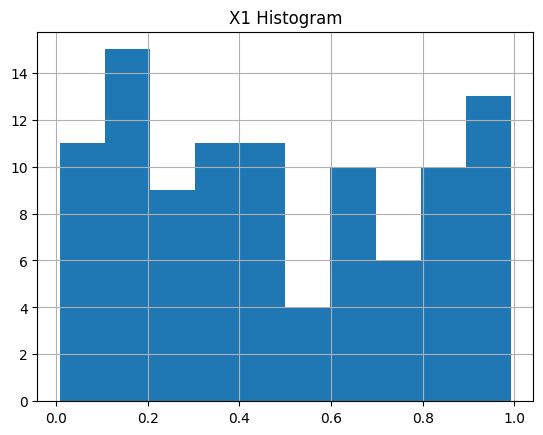

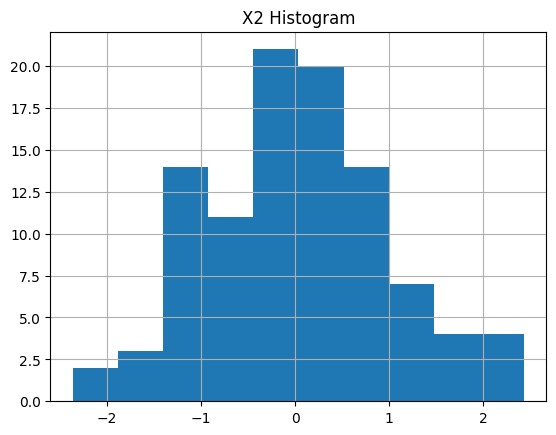

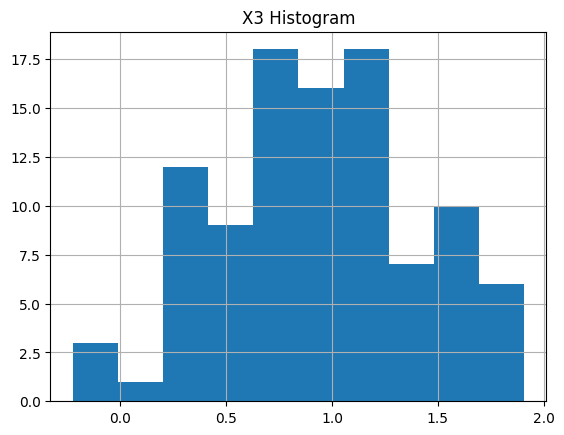

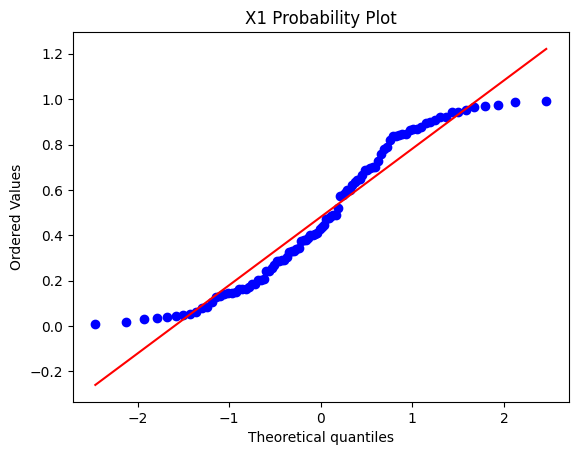

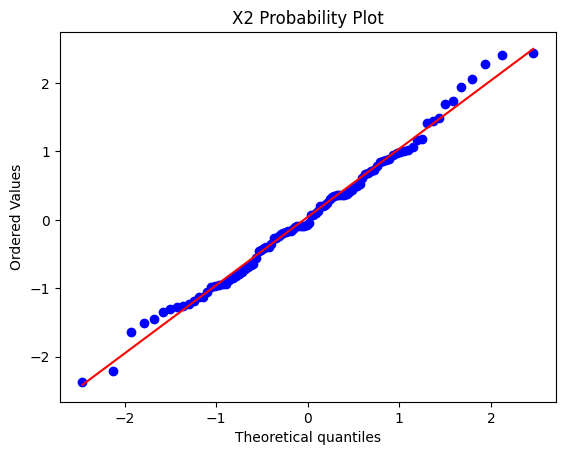

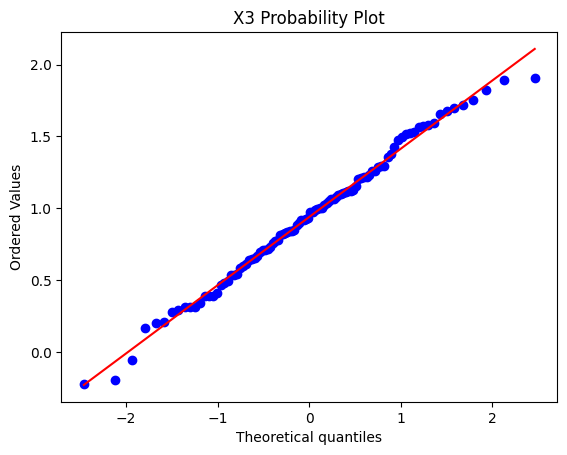

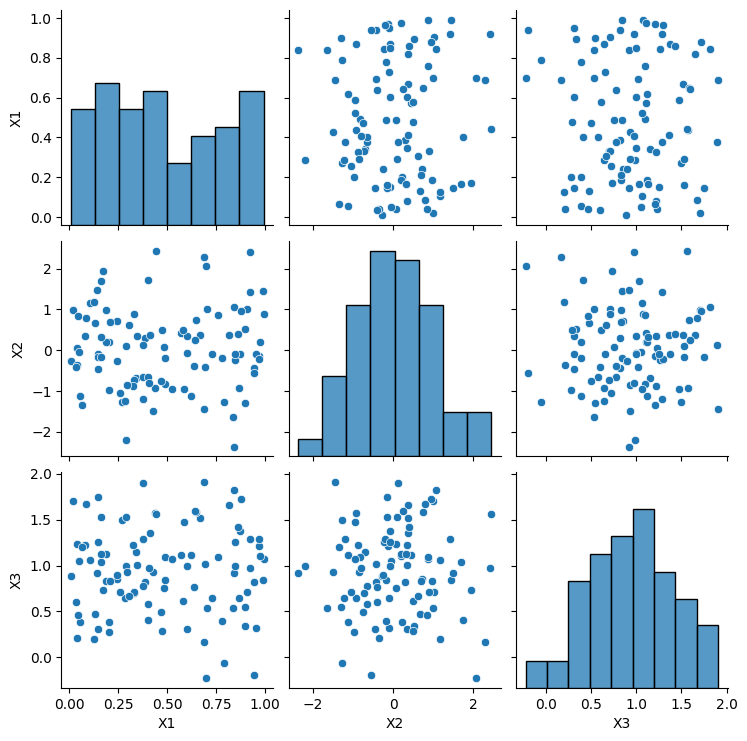

In [26]:
#%pip install -q pandas matplotlib scipy numpy seaborn
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

#create DF from csv
anova_pd = pd.read_csv('anova.csv')
anova_pd.drop('Type', axis = 1, inplace = True) #drop the Type column as its not numeric
anova_pd.drop(anova_pd.columns[0], axis = 1, inplace = True) #drop the first index column



#A
#Histogram
for column in anova_pd:
    plt.figure()
    anova_pd[column].hist()
    plt.title(column + ' Histogram')

#Probability plot
for column in anova_pd:
    plt.figure()
    stats.probplot(anova_pd[column], plot = plt)
    plt.title(column + ' Probability Plot')
    
#Pairwise scatter plot
sns.pairplot(anova_pd)
plt.show()







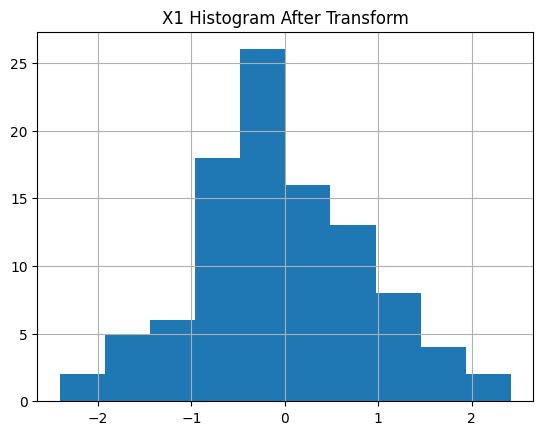

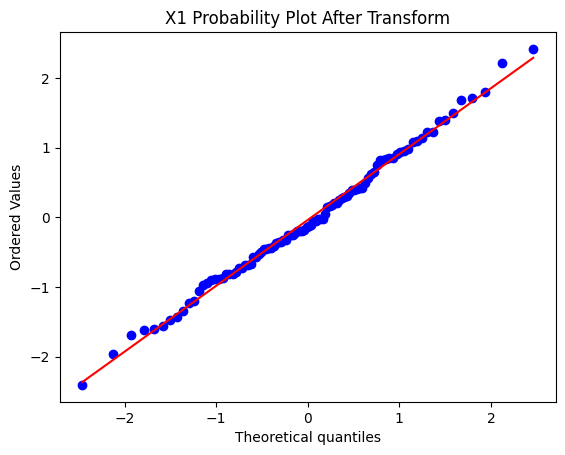

In [27]:
#B
#Log Transform X_1 Column
anova_pd['X1'] = anova_pd['X1'].apply(lambda x: (.5*np.log(x/(1-x))))
plt.figure()
anova_pd['X1'].hist()
plt.title('X1 Histogram After Transform')
plt.figure()
stats.probplot(anova_pd['X1'], plot = plt)
plt.title('X1 Probability Plot After Transform')
plt.show()